In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [7]:
from langchain.agents import create_agent
from langchain_groq import ChatGroq

In [21]:
llm = ChatGroq(
    model="openai/gpt-oss-120b",
    temperature=0.5,
    max_tokens=None,
    max_retries=2
)

In [22]:
agent = create_agent(
    model=llm,
    tools=[],
    system_prompt="You are a helpful assistant"
)

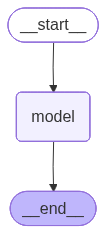

In [23]:
agent

In [24]:
def get_weather(city: str) -> str:
    """Get the weather in the city"""
    return f"The weather in the {city} is sunny! Plan your beach day or football game now!"

In [25]:
weather_agent = create_agent(
    model=llm,
    tools=[get_weather],
    system_prompt="You are a helpful agent. Provide clear and concise answers for the questions."
)

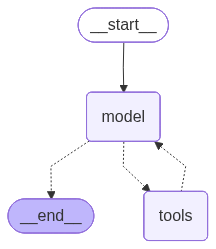

In [26]:
weather_agent

In [27]:
weather_agent.invoke(
    {
        "messages": [
            {
                "role":"user",
                "content":"Can I plan a beach day in Bangalore today?"
            }
        ]
    }
)

{'messages': [HumanMessage(content='Can I plan a beach day in Bangalore today?', additional_kwargs={}, response_metadata={}, id='08ae69d1-ae37-4cfa-aac7-22aa2b00802e'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'User asks: "Can I plan a beach day in Bangalore today?" They want to know if they can have a beach day in Bangalore. Bangalore is inland, no beach. But maybe they want to know weather? Could answer: No beach in Bangalore, but can go to nearby lakes or water parks. Also check weather for today. Could use get_weather for Bangalore. Let\'s fetch weather.', 'tool_calls': [{'id': 'fc_28c6ce91-456f-4d98-a356-6ecc139f745f', 'function': {'arguments': '{"city":"Bangalore"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 107, 'prompt_tokens': 148, 'total_tokens': 255, 'completion_time': 0.233073438, 'completion_tokens_details': {'reasoning_tokens': 79}, 'prompt_time': 0.00810407, 'prompt_tokens_details': None,

In [31]:
response = weather_agent.invoke(
    {
        "messages" : [
            {
                "role":"user",
                "content":"Can I plan a beach day in Chennai today?"
            }
        ]
    }
)

In [34]:
print(response)

{'messages': [HumanMessage(content='Can I plan a beach day in Chennai today?', additional_kwargs={}, response_metadata={}, id='3d7ad892-d418-481e-b25a-838eb1a9f8a5'), AIMessage(content='', additional_kwargs={'reasoning_content': 'User asks: "Can I plan a beach day in Chennai today?" Need to check weather. Use function get_weather with city "Chennai".', 'tool_calls': [{'id': 'fc_2fc41600-1595-4a82-97e5-224491251eeb', 'function': {'arguments': '{"city":"Chennai"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 148, 'total_tokens': 206, 'completion_time': 0.124286537, 'completion_tokens_details': {'reasoning_tokens': 30}, 'prompt_time': 0.006322157, 'prompt_tokens_details': None, 'queue_time': 0.045013483, 'total_time': 0.130608694}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_8a618bed98', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, 

In [32]:
response["messages"]

[HumanMessage(content='Can I plan a beach day in Chennai today?', additional_kwargs={}, response_metadata={}, id='3d7ad892-d418-481e-b25a-838eb1a9f8a5'),
 AIMessage(content='', additional_kwargs={'reasoning_content': 'User asks: "Can I plan a beach day in Chennai today?" Need to check weather. Use function get_weather with city "Chennai".', 'tool_calls': [{'id': 'fc_2fc41600-1595-4a82-97e5-224491251eeb', 'function': {'arguments': '{"city":"Chennai"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 148, 'total_tokens': 206, 'completion_time': 0.124286537, 'completion_tokens_details': {'reasoning_tokens': 30}, 'prompt_time': 0.006322157, 'prompt_tokens_details': None, 'queue_time': 0.045013483, 'total_time': 0.130608694}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_8a618bed98', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--

In [33]:
response["messages"][-1].content

'Yes—you can plan a beach day in Chennai today. The forecast is sunny, which is ideal for sun‑bathing, swimming, and beach games. Just keep in mind the usual midday heat and UV exposure, so bring sunscreen, a hat, plenty of water, and stay hydrated. Enjoy your day at the shore!'

In [36]:
weather_agent.invoke({"messages":"What is the weather like in New York?"})

{'messages': [HumanMessage(content='What is the weather like in New York?', additional_kwargs={}, response_metadata={}, id='f16116cb-c9c7-45a2-b0f7-78b2b11636c3'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks for weather in New York. Use function get_weather.', 'tool_calls': [{'id': 'fc_6cee0a2a-b934-4099-b814-1225711e4a98', 'function': {'arguments': '{"city":"New York"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 147, 'total_tokens': 190, 'completion_time': 0.091267783, 'completion_tokens_details': {'reasoning_tokens': 15}, 'prompt_time': 0.005940458, 'prompt_tokens_details': None, 'queue_time': 0.044813672, 'total_time': 0.097208241}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_a09bde29de', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c03-28c9-7c60-b59d-6d9e4ad2d230-0', tool_